# TASK 2

## A predictive model to determine the likelihood of survival for passengers on the Titanic using data science techniques in Python

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

The parameters included are :

1) Pclass	    : Passenger class	
2) Survived	    : Passenger survive(1) or not survived (0)
3) Name	        : Name of the passenger
4) Sex	        : Gender of the passenger (Male or Female)
5) Age	        : Age of the passenger
6) SibSp	    : Number of siblings/spouses
7) Parch        : Number of parents/children
8) Ticket       : Ticket number
9) Fare         : Ticket Fare
10) Cabin       : Cabin category
11) Embarked    : Port in UK where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)
12) Boat        : Boat number
13) Body        : Count of body of the passenger who didnot survive
14) Home.dest   : Destination in US 

## Our Task

Build a predictive model to determine the likelihood of survival for passengers on the Titanic using data science techniques in Python.


Process :-

1: Reading and Understanding Data 

2: Visualizing and Data Cleaning

3: Data Preparation

4: Building Model and testing

5: Inference

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Step 1- Reading and Understanding Data

### Importing libraries

In [76]:
# import required libraries for dataframe and visualization
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [77]:
# load data
df = pd.read_csv('D://DATA//DATA SCIENCE//Dataset-main//Titanic.csv',  encoding = 'unicode_escape')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [78]:
# shape
print("Titanic Data Size  :" ,df.size)
print("Titanic Data Shape :" ,df.shape)

Titanic Data Size  : 18326
Titanic Data Shape : (1309, 14)


In [79]:
# data description
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'])

,count,mean,std,min,25%,50%,75%,max
pclass,1309.000000,2.294882,0.837836,1.000000,2.000000,3.000000,3.000000,3.000000
survived,1309.000000,0.381971,0.486055,0.000000,0.000000,0.000000,1.000000,1.000000
age,1046.000000,29.881138,14.413493,0.170000,21.000000,28.000000,39.000000,80.000000
sibsp,1309.000000,0.498854,1.041658,0.000000,0.000000,0.000000,1.000000,8.000000
parch,1309.000000,0.385027,0.865560,0.000000,0.000000,0.000000,0.000000,9.000000
fare,1308.000000,33.295479,51.758668,0.000000,7.895800,14.454200,31.275000,512.329200
body,121.000000,160.809917,97.696922,1.000000,72.000000,155.000000,256.000000,328.000000


From the above description it is clear that negative or outliers values are present. 

In [80]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


From the above info  it is clear that null values are present and need to be rectified. 

In [81]:
# Finding the count of null values
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [82]:
# Dropping unwanted columns from the dataset which includes mostly columns with lot of missing values
df_new = df.drop(['name','ticket','cabin', 'boat', 'body','home.dest'], axis=1)
df_new.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.00,0,0,211.3375,S
1,1,1,male,0.92,1,2,151.5500,S
2,1,0,female,2.00,1,2,151.5500,S
3,1,0,male,30.00,1,2,151.5500,S
4,1,0,female,25.00,1,2,151.5500,S


In [83]:
# Replacing the missing values in 'Age' and 'Fare' column with mean value
df_new['age'].fillna(df_new['age'].mean(), inplace=True)
df_new['fare'].fillna(df_new['fare'].mean(), inplace=True)

In [84]:
# to find the mode of the column embarked to fill missing values
df_new['embarked'].mode()[0]

'S'

In [85]:
# replacing the missing values in embarked column with its mode value
df_new['embarked'].fillna(df_new['embarked'].mode()[0], inplace=True)

In [86]:
# check the number of missing values in each column
df_new.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

NO MORE MISSING VALUES IN THE DATASET

# Step 2 : Visualizing and Data Cleaning

In [87]:
# data description again
df_new.describe().T.style.background_gradient(subset=['mean','std','50%','count'])

,count,mean,std,min,25%,50%,75%,max
pclass,1309.000000,2.294882,0.837836,1.000000,2.000000,3.000000,3.000000,3.000000
survived,1309.000000,0.381971,0.486055,0.000000,0.000000,0.000000,1.000000,1.000000
age,1309.000000,29.881138,12.883193,0.170000,22.000000,29.881138,35.000000,80.000000
sibsp,1309.000000,0.498854,1.041658,0.000000,0.000000,0.000000,1.000000,8.000000
parch,1309.000000,0.385027,0.865560,0.000000,0.000000,0.000000,0.000000,9.000000
fare,1309.000000,33.295479,51.738879,0.000000,7.895800,14.454200,31.275000,512.329200


In [88]:
# survived and not survived counts
df_new['survived'].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

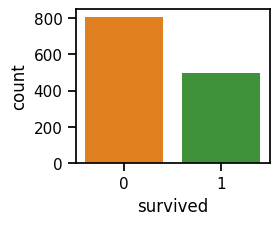

In [89]:
# visualizing each variables
plt.figure(figsize=(2.5, 2))
sns.set_context('notebook', font_scale = 1)
sns.countplot(x ='survived', data = df_new, palette ='Paired_r')

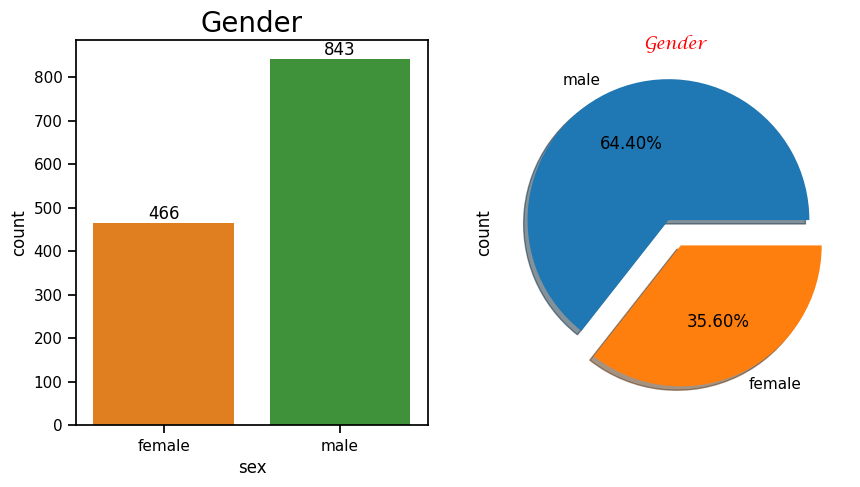

In [90]:
plt.figure(figsize=(10,5))

ax = plt.subplot(1,2,1)
ax = sns.countplot(x='sex', data=df_new, palette ='Paired_r')
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])
plt.title("Gender", fontsize=20)

ax =plt.subplot(1,2,2)
ax= df_new['sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%', shadow=True);
ax.set_title(label = "Gender", color='Red',font='Lucida Calligraphy');
plt.show()

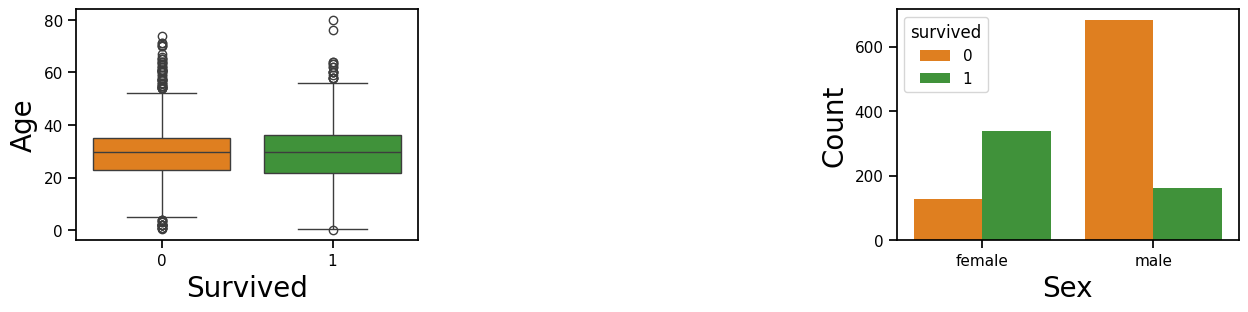

In [91]:
plt.figure(figsize=(15, 3))
plt.subplot(1,3,1)
sns.boxplot(x='survived', y='age', data=df_new, palette ='Paired_r')
plt.ylabel("Age", size=20)
plt.xlabel("Survived", size=20)


plt.subplot(1,3,3)
sns.countplot(x ='sex', data = df_new, palette ='Paired_r', hue='survived')
plt.ylabel("Count", size=20)
plt.xlabel("Sex", size=20)
plt.show()

<Axes: xlabel='embarked', ylabel='count'>

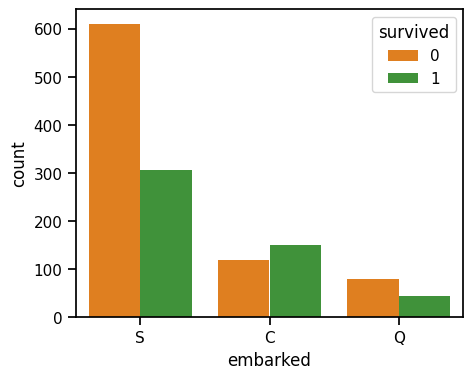

In [92]:
plt.figure(figsize=(5, 4))
sns.countplot(x ='embarked', data = df_new, palette ='Paired_r', hue='survived')

In [93]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_new['sex'] = le.fit_transform (df_new['sex'])
df_new['embarked'] = le.fit_transform (df_new['embarked'])
df_new.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.00,0,0,211.3375,2
1,1,1,1,0.92,1,2,151.5500,2
2,1,0,0,2.00,1,2,151.5500,2
3,1,0,1,30.00,1,2,151.5500,2
4,1,0,0,25.00,1,2,151.5500,2


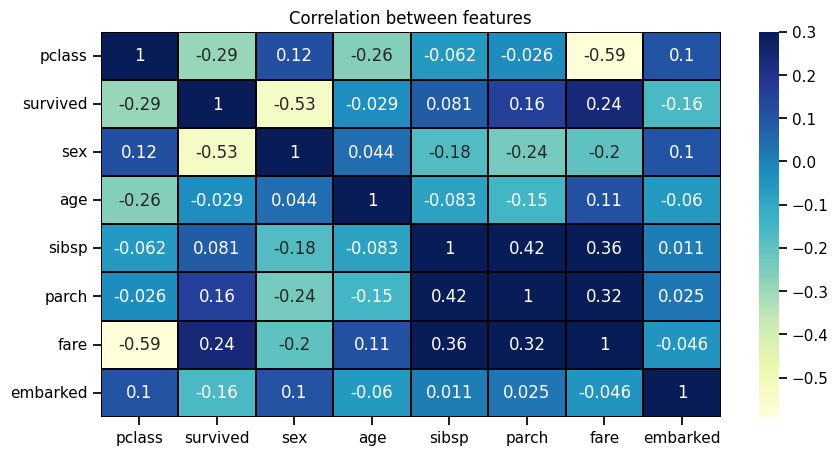

In [94]:
corr = df_new.corr(method='kendall')
plt.figure(figsize=(10, 5))
sns.heatmap(corr, vmax=.3, linewidths=0.01, annot=True, cmap='YlGnBu', linecolor="black")
plt.title('Correlation between features')
plt.show()

# Step 3 : Modeling

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC

In [96]:
# features or the dependent variables
X = df_new.drop(columns = ['survived'],axis=1)

# target 
Y = df_new['survived']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 2)

Selecting the features from the above conducted tests and splitting the data into 80 - 20 train - test groups.

In [97]:
def model(classifier):
    
    classifier.fit(X_train,Y_train)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy               : ",'{0:.2%}'.format(accuracy_score(Y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,X_train,Y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score          : ",'{0:.2%}'.format(roc_auc_score(Y_test,prediction)))
    
    #plt.figure(figsize=(3, 2))
    fig, ax = plt.subplots(figsize=(4, 3))

    # Use RocCurveDisplay.from_estimator to plot ROC curve
    RocCurveDisplay.from_estimator(classifier, X_test, Y_test, ax=ax)
    plt.title('ROC_AUC_Plot')
    plt.show()


    #clf = SVC(random_state=0).fit(X_train, Y_train)
    #RocCurveDisplay.from_estimator(clf, X_test, Y_test)
    #plt.title('ROC_AUC_Plot')
    #plt.show()


In [98]:
def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(Y_test,classifier.predict(X_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(3,2))    
    sns.heatmap(cm,annot=True,fmt="d",cbar=False)
    plt.xlabel("Predicted value")
    plt.ylabel("Actual value")
    plt.title("Confusion Matrix")

    # Classification Report
    print("-------------------------------------------------------------------------")
    print(classification_report(Y_test,classifier.predict(X_test)))
    print("-------------------------------------------------------------------------")


1) Model - Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
classifier_lr = LogisticRegression(random_state = 0, C=10, penalty= 'l2') 

Accuracy               :  82.06%


Cross Validation Score :  83.54%
ROC_AUC Score          :  79.06%


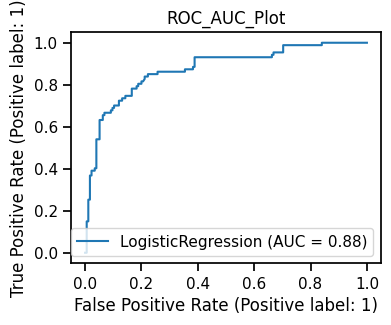

In [101]:
model(classifier_lr)

-------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       175
           1       0.74      0.70      0.72        87

    accuracy                           0.82       262
   macro avg       0.80      0.79      0.79       262
weighted avg       0.82      0.82      0.82       262

-------------------------------------------------------------------------


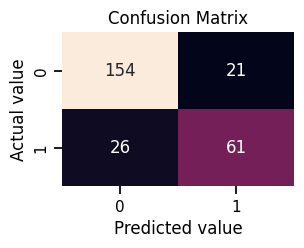

In [102]:
model_evaluation(classifier_lr)

2) Model-  Support Vector Classifier :

In [103]:
from sklearn.svm import SVC

In [104]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

Accuracy               :  82.06%
Cross Validation Score :  82.48%
ROC_AUC Score          :  79.92%


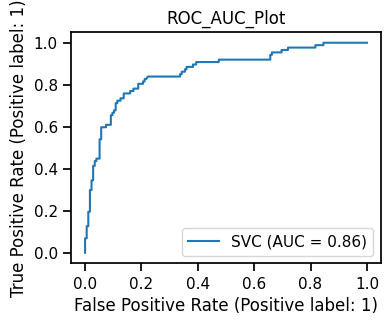

In [105]:
model(classifier_svc)

-------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       175
           1       0.73      0.74      0.73        87

    accuracy                           0.82       262
   macro avg       0.80      0.80      0.80       262
weighted avg       0.82      0.82      0.82       262

-------------------------------------------------------------------------


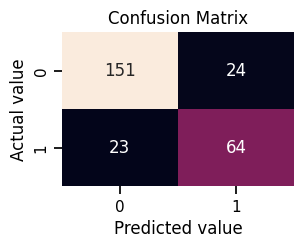

In [106]:
model_evaluation(classifier_svc)

3)Model -  K-nearest Neighbors Classifier :

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Accuracy               :  73.66%
Cross Validation Score :  70.69%
ROC_AUC Score          :  68.44%


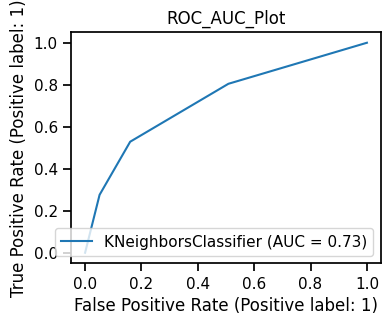

In [109]:
model(classifier_knn)

-------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       175
           1       0.62      0.53      0.57        87

    accuracy                           0.74       262
   macro avg       0.70      0.68      0.69       262
weighted avg       0.73      0.74      0.73       262

-------------------------------------------------------------------------


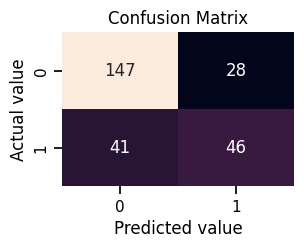

In [110]:
model_evaluation(classifier_knn)

3) Model -  Decision Tree Classifier :

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Accuracy               :  82.06%


Cross Validation Score :  82.98%
ROC_AUC Score          :  75.88%


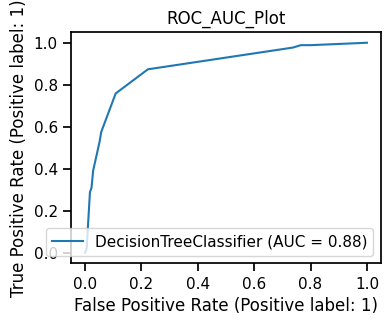

In [113]:
model(classifier_dt)

-------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       175
           1       0.83      0.57      0.68        87

    accuracy                           0.82       262
   macro avg       0.83      0.76      0.78       262
weighted avg       0.82      0.82      0.81       262

-------------------------------------------------------------------------


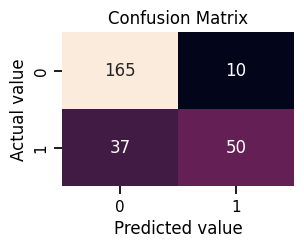

In [114]:
model_evaluation(classifier_dt)

4) Model -  Random Forest Classifier :

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Accuracy               :  82.06%
Cross Validation Score :  84.31%
ROC_AUC Score          :  76.17%


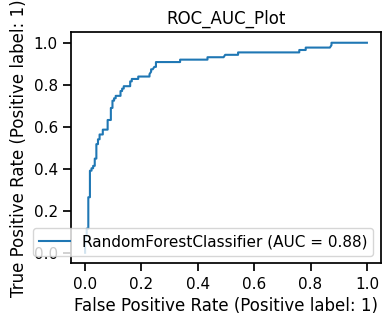

In [117]:
model(classifier_rf)

-------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       175
           1       0.82      0.59      0.68        87

    accuracy                           0.82       262
   macro avg       0.82      0.76      0.78       262
weighted avg       0.82      0.82      0.81       262

-------------------------------------------------------------------------


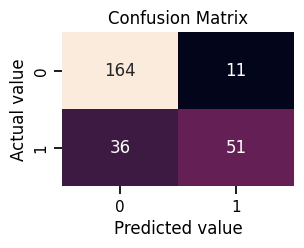

In [118]:
model_evaluation(classifier_rf)

### Perfomance result of the models used.

In [196]:
df1 = pd.read_csv('D://DATA//Bharat Intern//task 2 - Titanic//table_2.csv')
df1.head()

,ML Algorithm,Accuracy,Cross Validation Score,ROC AUC Score
0,Logistic Regression,82.06,83.54,79.06
1,Support Vector Classifier,82.06,82.48,79.92
2,K-Nearest Neighbors Classfier,73.66,70.69,68.44
3,Decision Tree Classifier,82.06,82.98,75.88
4,Random Forest Classifier,82.06,84.31,76.17


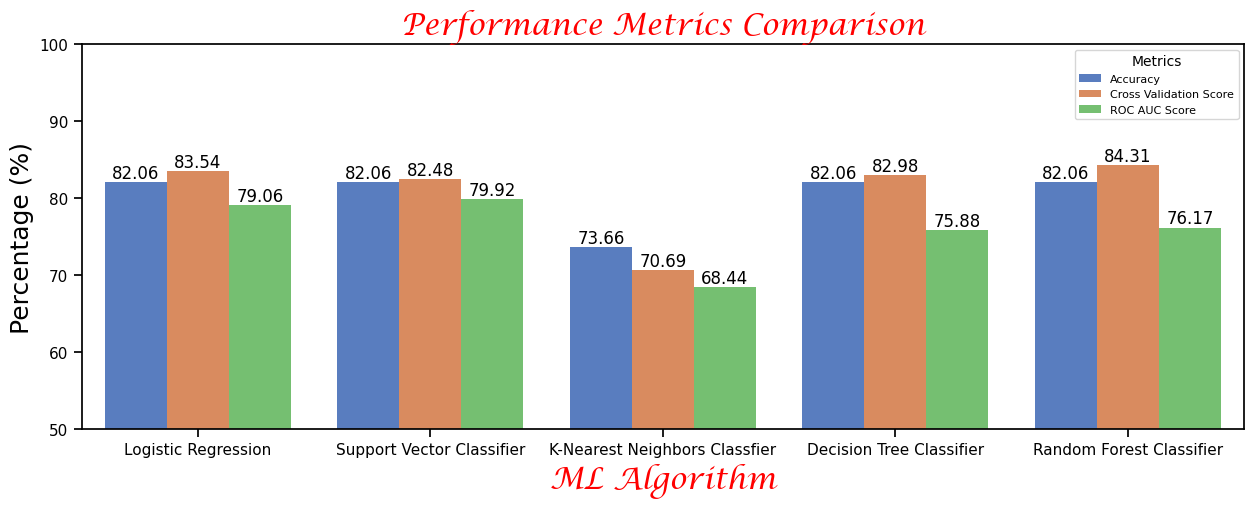

In [197]:
plt.figure(figsize=(15, 5))

# Melt the DataFrame for easier plotting
melted_data = pd.melt(df1, id_vars='ML Algorithm', var_name='Variable', value_name='Score')


# Plotting code using Seaborn
ax = sns.barplot(x= 'ML Algorithm', y='Score', hue='Variable', data=melted_data, palette='muted')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])


# Customize the plot
plt.title('Performance Metrics Comparison', color='Red', font='Lucida Calligraphy', fontsize=21)
plt.xlabel('ML Algorithm',color='Red',font='Lucida Calligraphy', fontsize=21)
plt.ylim(50, 100)
plt.ylabel('Percentage (%)', fontsize=18)
plt.legend(title='Metrics', title_fontsize='10', fontsize='8')

# Show the plot
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)